In [65]:
"""
use this notebook to make the secondary signal processing code (applying cuts to the data)

Cuts:



CSV has columns 0 to 12:
(index column)
column 0: baseline
column 1: sd_baseline
column 2: amplitude
column 3: peak_time
column 4: FWHM
column 5: t1_of_FWHM
column 6: t2_of_FWHM
column 7: time_above_3sigma
column 8: first_3sigma_crossing
column 9: second_3sigma_crossing
column 10: integral_pC
column 11: peaks_over_15sigma_threshold
column 12: event_timestamps

"""

'\nuse this notebook to make the secondary signal processing code (applying cuts to the data)\n\nCuts:\n\n\n\nCSV has columns 0 to 12:\n(index column)\ncolumn 0: baseline\ncolumn 1: sd_baseline\ncolumn 2: amplitude\ncolumn 3: peak_time\ncolumn 4: FWHM\ncolumn 5: t1_of_FWHM\ncolumn 6: t2_of_FWHM\ncolumn 7: time_above_3sigma\ncolumn 8: first_3sigma_crossing\ncolumn 9: second_3sigma_crossing\ncolumn 10: integral_pC\ncolumn 11: peaks_over_15sigma_threshold\ncolumn 12: event_timestamps\n\n'

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gamma
import os
from os.path import exists
import matplotlib.colors as mcolors
from matplotlib.colors import PowerNorm

#file being read in
#df = pd.read_csv('Processed15Sigma/141125_darkrate_1850_10000_2_on_processed_threshold15.csv')
df_proc = pd.read_csv('CORRECTED_INDICES_processed/220126_darkrate_1750_10000_1_on_processed_threshold11.csv')

df_clean = pd.read_csv('CORRECTED_INDICES_AMPCUTS/220126_darkrate_1750_10000_1_on_processed_threshold11_cleaned.csv')

'''
Cleaning Cuts applied:
- Must have time above threshold > 0 (threshold found as a function of DR)
- If the sigma baseline of an individual sample is greater than the mean + 15*standard deviations 
    of the sigma baseline distribution from all samples
'''


'\nCleaning Cuts applied:\n- Must have time above threshold > 0 (threshold found as a function of DR)\n- If the sigma baseline of an individual sample is greater than the mean + 15*standard deviations \n    of the sigma baseline distribution from all samples\n'

In [67]:
# Filter accepted events
accepted = df_proc[df_proc['event_id'].isin(df_clean['event_id'])]
print(accepted.shape)
# Filter rejected events
rejected = df_proc[~df_proc['event_id'].isin(df_clean['event_id'])]
print(rejected.shape)


(3355, 14)
(6645, 14)


In [68]:
# plot 2d histogram of pulse amplitudes before cuts
amplitudes_proc = df_proc['amplitude'] * 1e3
pulse_integrals_proc = df_proc['integral_pC']

#pulses and amplitudes after cuts
amplitudes_clean = df_clean['amplitude'] * 1e3
pulse_integrals_clean = df_clean['integral_pC']


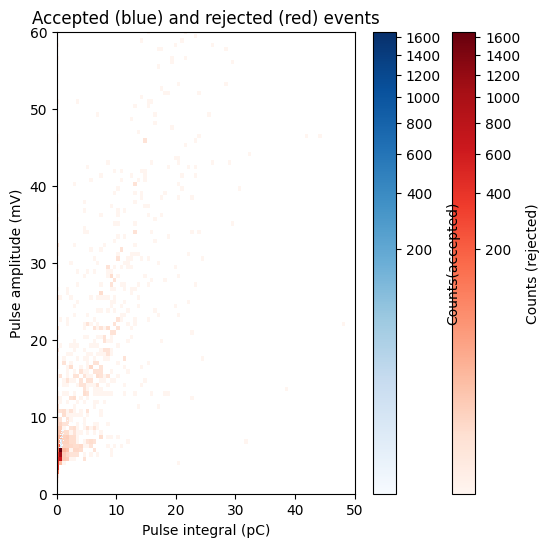

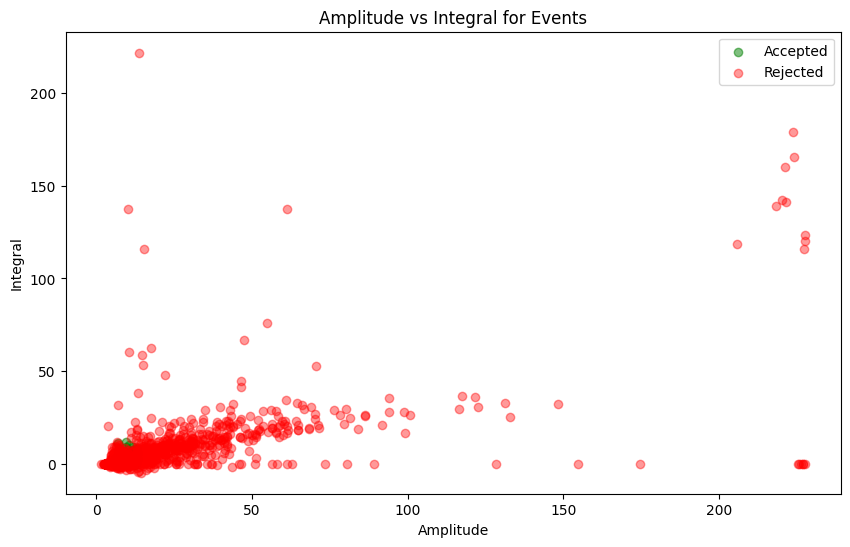

In [69]:

# Choose common bins so they line up
integral_bins = np.linspace(min(pulse_integrals_proc.min(), pulse_integrals_clean.min()),
                            max(pulse_integrals_proc.max(), pulse_integrals_clean.max()),500)

amp_bins = np.linspace(min(amplitudes_proc.min(), amplitudes_clean.min()),
                       max(amplitudes_proc.max(), amplitudes_clean.max()), 500)


norm = PowerNorm(gamma=0.3)

#plt.figure(figsize=(7,6))
'''
h_all = plt.hist2d(
    pulse_integrals_proc,
    amplitudes_proc,
    bins=[integral_bins, amp_bins],
    density=False,
    cmap='Reds',
    alpha=1,
    cmin=1,
    norm=norm
)

# ---- Foreground: cleaned data ----
h_clean = plt.hist2d(
    pulse_integrals_clean,
    amplitudes_clean,
    bins=[integral_bins, amp_bins],
    density=False,
    cmap='Blues',
    alpha=1,
    cmin=1,
    norm=norm
)

plt.ylabel('Pulse amplitude (mV)')
plt.xlabel('Pulse Integral (pC)')
plt.title('Amplitude–Integral histogram: processed (grey) vs cleaned (colour)')
plt.colorbar(h_clean[3], label='Counts (cleaned)')
plt.colorbar(h_all[3], label='Counts(processed)')
plt.xlim([0, 40])
plt.ylim([0, 70])
plt.show()
'''

plt.figure(figsize=(6,6))

h_rejected = plt.hist2d(
    rejected["integral_pC"],
    rejected["amplitude"]*1e3,
    bins=400,
    density=False,
    cmap="Reds",
    alpha=1,
    cmin=1,
    norm=norm
)

h_accepted = plt.hist2d(
    accepted["integral_pC"],
    accepted["amplitude"]*1e3,
    bins=400,
    density=False,
    cmap="Blues",
    alpha=1,
    cmin=1,
    norm=norm
)

plt.xlabel("Pulse integral (pC)")
plt.ylabel("Pulse amplitude (mV)")
plt.title("Accepted (blue) and rejected (red) events")
plt.xlim([0, 50])
plt.ylim([0, 60])
plt.colorbar(h_rejected[3], label='Counts (rejected)')
plt.colorbar(h_accepted[3], label='Counts(accepted)')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(
    accepted['amplitude']*1e3, 
    accepted['integral_pC'], 
    color='green', 
    alpha=0.5, 
    label='Accepted'
)

# Plot rejected events
plt.scatter(
    rejected['amplitude']*1e3, 
    rejected['integral_pC'], 
    color='red', 
    alpha=0.4, 
    label='Rejected'
)

plt.xlabel('Amplitude')
plt.ylabel('Integral')
plt.title('Amplitude vs Integral for Events')
plt.legend()
plt.show()
